In [2]:
import pandas as pd
import seaborn as sns


import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

import itertools
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(40)

,VASK0,VASK1,VASK2,VASK3,VASK4,VBID0,VBID1,VBID2,VBID3,VBID4,...,VASK1_PREV,VASK2_PREV,VASK3_PREV,VASK4_PREV,VBID0_PREV,VBID1_PREV,VBID2_PREV,VBID3_PREV,VBID4_PREV,Y
0,108,276,224,196,195,132,181,253,207,185,...,276,224,196,195,136,181,253,207,185,0
1,47,132,197,236,188,81,146,193,169,192,...,132,197,236,188,81,146,193,169,192,0
2,93,172,193,226,232,33,128,168,145,140,...,172,193,226,232,33,128,168,145,140,0
3,62,104,169,188,140,75,165,151,206,105,...,104,169,188,140,81,165,151,206,105,0
4,40,43,87,110,99,11,66,77,155,364,...,43,87,110,99,11,66,77,153,364,0
5,185,259,224,295,261,12,164,249,231,239,...,259,224,295,261,20,164,249,231,239,0
6,115,150,241,228,198,54,254,203,169,189,...,150,241,228,198,56,254,203,169,189,0
7,233,182,179,183,185,18,181,188,216,165,...,182,179,183,185,18,181,188,216,164,0
8,7,161,272,147,134,172,273,182,363,194,...,161,272,147,134,172,273,182,363,194,0
9,10,121,200,266,230,118,185,173,198,157,...,121,200,266,230,118,185,173,198,157,0


In [5]:
df.shape

(186590, 21)

In [6]:
df.isnull().any()

VASK0         False
VASK1         False
VASK2         False
VASK3         False
VASK4         False
VBID0         False
VBID1         False
VBID2         False
VBID3         False
VBID4         False
VASK0_PREV    False
VASK1_PREV    False
VASK2_PREV    False
VASK3_PREV    False
VASK4_PREV    False
VBID0_PREV    False
VBID1_PREV    False
VBID2_PREV    False
VBID3_PREV    False
VBID4_PREV    False
Y             False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186590 entries, 0 to 186589
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   VASK0       186590 non-null  int64
 1   VASK1       186590 non-null  int64
 2   VASK2       186590 non-null  int64
 3   VASK3       186590 non-null  int64
 4   VASK4       186590 non-null  int64
 5   VBID0       186590 non-null  int64
 6   VBID1       186590 non-null  int64
 7   VBID2       186590 non-null  int64
 8   VBID3       186590 non-null  int64
 9   VBID4       186590 non-null  int64
 10  VASK0_PREV  186590 non-null  int64
 11  VASK1_PREV  186590 non-null  int64
 12  VASK2_PREV  186590 non-null  int64
 13  VASK3_PREV  186590 non-null  int64
 14  VASK4_PREV  186590 non-null  int64
 15  VBID0_PREV  186590 non-null  int64
 16  VBID1_PREV  186590 non-null  int64
 17  VBID2_PREV  186590 non-null  int64
 18  VBID3_PREV  186590 non-null  int64
 19  VBID4_PREV  186590 non-null  int64
 20  Y   

In [8]:
df.var()

VASK0         4421.147846
VASK1         3861.158647
VASK2         3965.197718
VASK3         4309.244949
VASK4         4565.954963
VBID0         4261.635015
VBID1         3529.499085
VBID2         3427.749432
VBID3         3514.868364
VBID4         3753.486583
VASK0_PREV    4434.353003
VASK1_PREV    3865.537248
VASK2_PREV    3966.687799
VASK3_PREV    4309.521650
VASK4_PREV    4566.206056
VBID0_PREV    4274.038353
VBID1_PREV    3533.703742
VBID2_PREV    3429.038497
VBID3_PREV    3515.275909
VBID4_PREV    3753.273505
Y                0.010153
dtype: float64

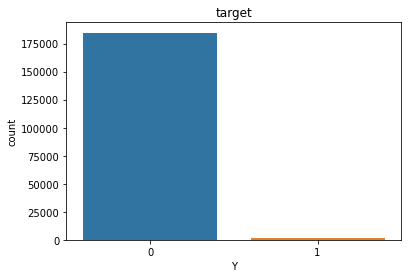

In [9]:
sns.countplot(df.Y)
plt.title("target")
plt.show()

In [10]:
print("Target balance: {}% ".format(100 * df['Y'].value_counts()[1]/df.shape[0]))

Target balance: 1.0257784447183664% 


In [11]:
test_df = pd.read_csv('test.csv')

In [12]:
test_df.shape

(93296, 20)

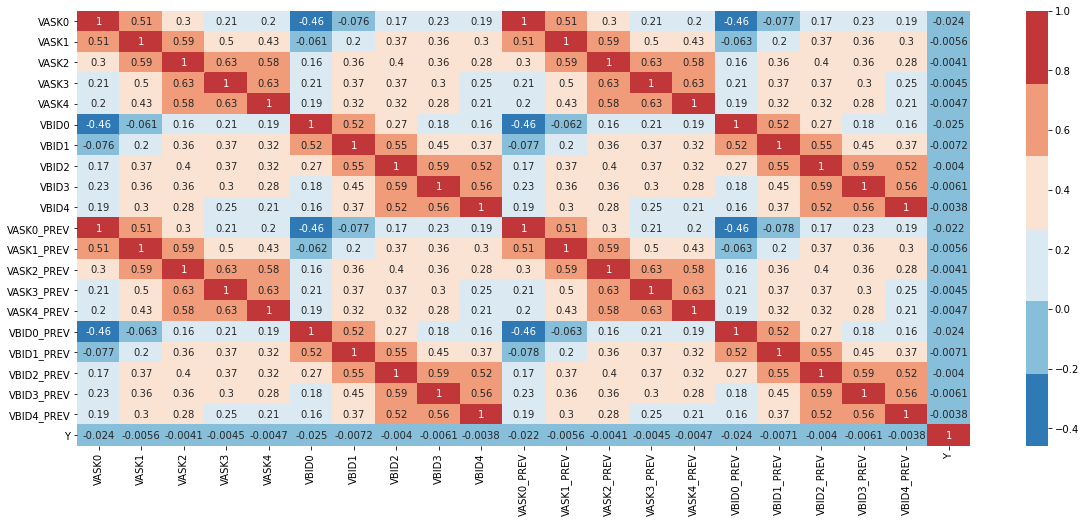

In [13]:
corr = df.corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette('RdBu_r'), 
            annot=True)

plt.show()

In [14]:
def feature_importance():
    forest = RandomForestClassifier()

    forest.fit(df.drop('Y', axis=1), df.Y)

    imp = forest.feature_importances_
    name = np.array(df.drop('Y', axis=1).columns.values.tolist())


    df_imp = pd.DataFrame({'feature':name, 'importance':imp})
    df_imp = df_imp.sort_values(by='importance', ascending=False)

    plt.figure(figsize=(8,20))
    sns.barplot(df_imp.loc[(df_imp['importance'] > 0.01),'importance'], y = df_imp.loc[(df_imp['importance'] > 0.01),'feature'])
    plt.title('Important features')
    plt.show()

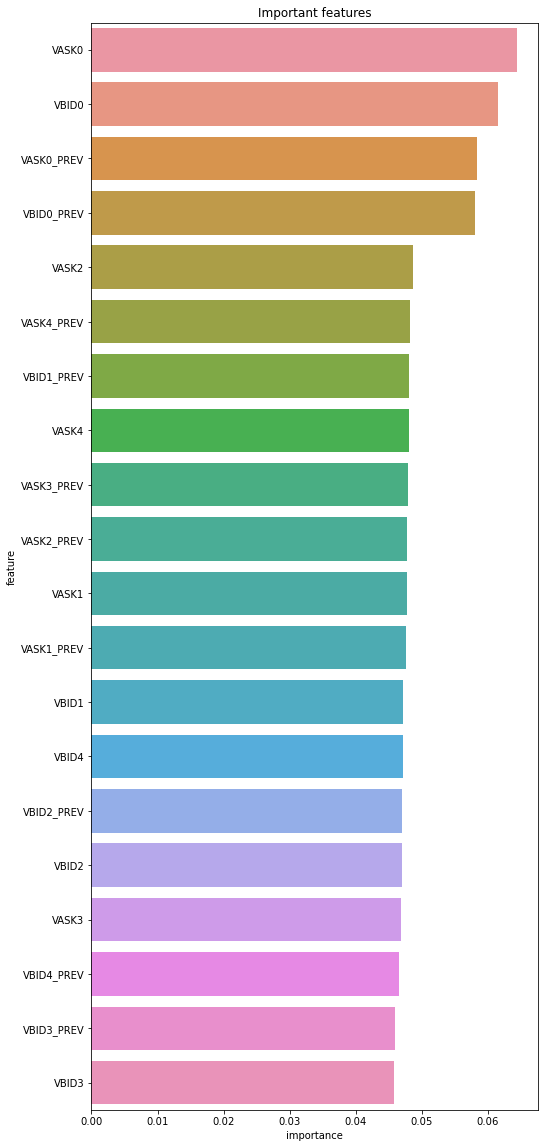

In [15]:
feature_importance()

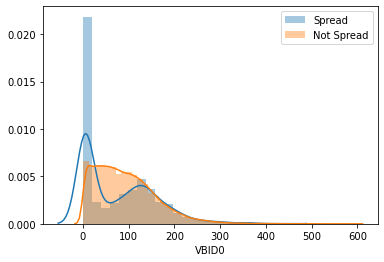

In [16]:
sns.distplot(df[df['Y'] == 1]['VBID0'], label="Spread")
sns.distplot(df[df['Y'] == 0]['VBID0'], label="Not Spread")
plt.legend()

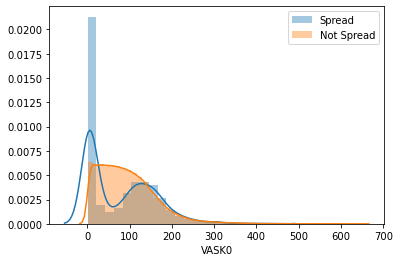

In [17]:
sns.distplot(df[df['Y'] == 1]['VASK0'], label="Spread")
sns.distplot(df[df['Y'] == 0]['VASK0'], label="Not Spread")
plt.legend()

In [18]:
samplers = {'SMOTE': SMOTE(k_neighbors=5, random_state=42),
            'Random_under_sampler': RandomUnderSampler(),
            'Random_over_sampler': RandomOverSampler()
           }


classifiers = {
    'Logistic Regression' : LogisticRegression(),
               'KNN': KNeighborsClassifier(),
               'Random Forest': RandomForestClassifier(),
               'AdaBoost': AdaBoostClassifier(),
               'XGBoost' : XGBClassifier()
              }

In [19]:
def df_split(df, target='Y'):
    
    scaler = preprocessing.StandardScaler().fit(df.drop(target, axis=1))
    x = scaler.transform(df.drop(target, axis=1))
    y = df[target]    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)                          
    return x_train, x_test, y_train, y_test

In [20]:
x_train, x_test, y_train, y_test = df_split(df)

def train_clfs(df, classifiers, samplers):
    
    names_samplers = []
    names_clfs = []
    results_train_cv_roc_auc = []
    results_test_roc_auc = []
    
    for name_sampler, sampler in samplers.items():
        print(f'Sampler: {name_sampler}\n')
        for name_clf, clf in classifiers.items():
            print(f'Classifier: {name_clf}\n')
            
            pipeline = Pipeline([('sampler', sampler),
                                 ('clf', clf)])
            
            cv_auc = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)    
            
            pipeline.fit(x_train, y_train)        
            y_pred = pipeline.predict(x_test)
            
            names_samplers.append(name_sampler)
            names_clfs.append(name_clf)
            results_train_cv_roc_auc.append(cv_auc)
            
            
            results_test_roc_auc.append(roc_auc_score(y_test, y_pred))

            print(f'CV\t-\troc_auc:\t{round(cv_auc.mean(), 3)}')

            print(f'Test\t-\troc_auc:\t{round(roc_auc_score(y_test, y_pred), 3)}')         
            print('\n<-------------------------->\n')

    df_results_test = pd.DataFrame(index=[names_clfs, names_samplers], columns=['ROC_AUC'])
    df_results_test['ROC_AUC'] = results_test_roc_auc

    return df_results_test

In [ ]:
df_results_test = train_clfs(df, classifiers, samplers)

In [21]:
def train_model(df):


    param_grid = {'max_depth': [3, 4],
                  'learning_rate': [ 0.05, 0.1],
                  'colsample_bytree': [0.6, 0.7, 0.8],
                  'min_child_weight': [0.4, 0.5, 0.6],
                  'n_estimators': [100,150, 300]
                  }
    
    
    rs_clf = GridSearchCV(
                estimator=LGBMClassifier(), 
                param_grid=param_grid, 
                n_jobs=-1, 
                cv=5, 
                verbose=1,
                return_train_score=True,
    scoring='roc_auc'
            )

    rs_clf.fit(x_train, y_train)


    y_pred = rs_clf.predict_proba(x_test)[:,1]

    df_results_xgb = pd.DataFrame(index=[['Boost'], ['No_sampler']], columns=['ROC_AUC'])
    
    df_results_xgb['ROC_AUC'] = roc_auc_score(y_test, y_pred)
    print(roc_auc_score(y_test, y_pred))
    print(f'BEST PARAMS: {rs_clf.best_params_}')

    return df_results_xgb

In [ ]:
df_results_model = train_model(df)

In [ ]:
df_results = pd.concat([df_results_test, df_results_model])

In [ ]:
df_results.sort_values('ROC_AUC', ascending=False)

In [ ]:
def plot_test(df, xlim_min, xlim_max):

    f, (ax1) = plt.subplots(1, 1, figsize=(12,18))
    color = ['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'navy', 'turquoise', 'darkorange']

    df['ROC_AUC'].plot(kind='barh', ax=ax1, xlim=(xlim_min, xlim_max), title='ROC_AUC', color=color)
    plt.show()
    
plot_test(df_plot, 0.4, 1)

In [22]:
def plot_confusion_matrix(y_test, y_pred, title='Confusion matrix'):
    
    cm = confusion_matrix(y_test, y_pred)
    classes = ['0', '1']

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, )
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

    
    


def train_clf_threshold(clf, sampler=None):
    thresholds = np.arange(0.1, 1, 0.1)
    
    
    
    if sampler:
        clf_train = Pipeline([('sampler', sampler),
                              ('clf', clf)])
        
    else:        
        clf_train = clf
            
    clf_train.fit(x_train, y_train)
    y_proba = clf_train.predict_proba(x_test)[:,1]
    
    plt.figure(figsize=(10,10))

    print('AUC: {}'.format(roc_auc_score(y_test, y_proba)))
    
    j = 1
    for i in thresholds:
        y_pred = y_proba > i
        plt.subplot(4, 3, j)
        j += 1

        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test,y_pred)
        np.set_printoptions(precision=2)

        print(f"Threshold: {round(i, 1)}")

        # Plot non-normalized confusion matrix
        plot_confusion_matrix(y_test, y_pred, title=f'Threshold = {round(i, 1)}')
        
    

In [24]:
best_classifier = LGBMClassifier(colsample_bytree= 0.8, 
                                 learning_rate = 0.05,
                                 max_depth = 4, 
                                 min_child_weight = 0.6, 
                                 n_estimators = 100
   )

In [23]:
best_classifier.fit(x_train, y_train)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=4,
               min_child_weight=0.6)

AUC: 0.8722192433889044
Threshold: 0.1
Threshold: 0.2
Threshold: 0.3
Threshold: 0.4
Threshold: 0.5
Threshold: 0.6
Threshold: 0.7
Threshold: 0.8
Threshold: 0.9


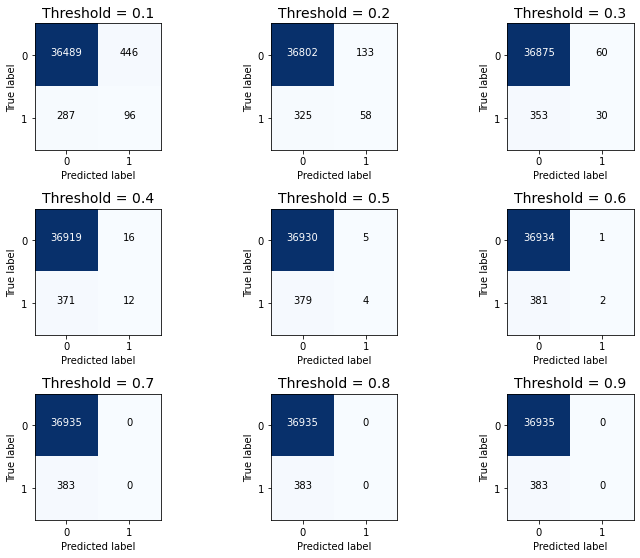

In [24]:
train_clf_threshold(best_classifier)

In [25]:
y_proba = best_classifier.predict_proba(x_test)

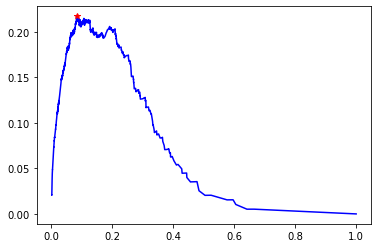

{'threshold': 0.08283118848037806, 'f1': 0.21705426356589144}

In [26]:
def threshold_search(y_test, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    thresholds = np.append(thresholds, 1.001) 
    F = 2 / (1/precision + 1/recall)
    best_score = np.max(F)
    best_th = thresholds[np.argmax(F)]
    
    plt.plot(thresholds, F, '-b')
    plt.plot([best_th], [best_score], '*r')
    plt.show()
    search_result = {'threshold': best_th , 'f1': best_score}
    return search_result 


threshold_search(y_test, y_proba[:,1])

In [27]:
scaler = preprocessing.StandardScaler().fit(df.drop('Y', axis=1))

In [28]:
best_classifier.fit(scaler.transform(df.drop('Y', axis=1)) , df.Y)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=4,
               min_child_weight=0.6)

In [29]:
test_df_proba = best_classifier.predict_proba(scaler.transform(test_df))[:,1]

In [32]:
tesss = scaler.transform(test_df)           

In [33]:
test_df_proba = best_classifier.predict_proba(tesss)[:,1]

In [34]:
test_df_proba.sum()

963.2453307342886

In [35]:
test_df_proba

array([0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.  ])

In [ ]:
submission = pd.DataFrame((test_df_proba > 0.19).astype(int))
submission.to_csv('submission.csv')

In [ ]:
submission_proba = pd.DataFrame({'Y_PRED':test_df_proba})
submission_proba.to_csv('submission_proba.csv')